# Capstone Project - The Optimal Locations for Indian Restaurent

## Applied Data Science Capstone by IBM/Coursera



## Table of Contents

* [Introducation to Bussiness problem](#introducation)
* [Data]()
* [Methodology]()
* [Result]()
* [Conclusion](#clonclustion)

## Introducation to Bussiness problem<a name="introduction"></a>

As an Indian and food lover, I was always curious to, what if someone like me want to open Indian restaurant. Great!!! 
I choose London for my analysis. London is diverse city. London is home of 500k people roughly 10% of total population, originated from Indian, Pakistan and Bangladesh. India Pakistan and Bangladesh were a single country in colonial era. And it had been ruled by Britain, so lot of people for Indian subcontinent are moved to Britain and especially London, Additional to that, lot of travellers visit to London. Thant’s why I am so excited about London

Since we have decided to open an Indian restaurant in London, we need to get optimal location. For that we are considering some criteria. 
•	We will consider the area which has more Indian population
•	Restaurant should be not crowed with another Indian restaurants
•	It should be as near to city centre as possible
There are 33 boroughs in London, and we will study each of them




#### 1. Importing Libraries

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns
sns.set(style='darkgrid')

import pandas.io.json
import requests
import json

from bs4 import BeautifulSoup

from geopy.geocoders import Nominatim
from  geopy import distance

import geocoder
import folium

# Hide all warnings
import warnings
warnings.filterwarnings('ignore')

print('Libraries Imported')

Libraries Imported



## 2. Data
   We will work in Borough of London, UK, we will scrap the data from [List of London Borough](https://en.wikipedia.org/wiki/List_of_London_boroughs). Page contens two table 'List of boroughs and local authorities' and
   'City of London'

In [3]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_London_boroughs',header=0)[0]

In [4]:
df

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,".mw-parser-output .geo-default,.mw-parser-outp...",25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20
5,Camden,NaN,NaN,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,229719,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W,11
6,Croydon,NaN,NaN,Croydon London Borough Council,Labour,"Bernard Weatherill House, Mint Walk",33.41,372752,51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W,19
7,Ealing,NaN,NaN,Ealing London Borough Council,Labour,"Perceval House, 14-16 Uxbridge Road",21.44,342494,51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W,13
8,Enfield,NaN,NaN,Enfield London Borough Council,Labour,"Civic Centre, Silver Street",31.74,320524,51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W,30
9,Greenwich [note 2],[note 3],Royal,Greenwich London Borough Council,Labour,"Woolwich Town Hall, Wellington Street",18.28,264008,51°29′21″N 0°03′53″E﻿ / ﻿51.4892°N 0.0648°E,22


In [5]:
df2 = pd.read_html('https://en.wikipedia.org/wiki/List_of_London_boroughs',header=0)[1]

In [6]:
df = df.append(df2, ignore_index=True)

In [7]:
df

,Area (sq mi),Borough,Co-ordinates,Headquarters,Inner,Local authority,Nr. in map,Nr. inmap,Political control,Population (2013 est)[1],Population(2011 est),Status
0,13.93,Barking and Dagenham [note 1],".mw-parser-output .geo-default,.mw-parser-outp...","Town Hall, 1 Town Square",NaN,Barking and Dagenham London Borough Council,25.0,NaN,Labour,194352.0,NaN,NaN
1,33.49,Barnet,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,"Barnet House, 2 Bristol Avenue, Colindale",NaN,Barnet London Borough Council,31.0,NaN,Conservative,369088.0,NaN,NaN
2,23.38,Bexley,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,"Civic Offices, 2 Watling Street",NaN,Bexley London Borough Council,23.0,NaN,Conservative,236687.0,NaN,NaN
3,16.70,Brent,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,"Brent Civic Centre, Engineers Way",NaN,Brent London Borough Council,12.0,NaN,Labour,317264.0,NaN,NaN
4,57.97,Bromley,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,"Civic Centre, Stockwell Close",NaN,Bromley London Borough Council,20.0,NaN,Conservative,317899.0,NaN,NaN
5,8.40,Camden,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W,"Camden Town Hall, Judd Street",NaN,Camden London Borough Council,11.0,NaN,Labour,229719.0,NaN,NaN
6,33.41,Croydon,51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W,"Bernard Weatherill House, Mint Walk",NaN,Croydon London Borough Council,19.0,NaN,Labour,372752.0,NaN,NaN
7,21.44,Ealing,51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W,"Perceval House, 14-16 Uxbridge Road",NaN,Ealing London Borough Council,13.0,NaN,Labour,342494.0,NaN,NaN
8,31.74,Enfield,51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W,"Civic Centre, Silver Street",NaN,Enfield London Borough Council,30.0,NaN,Labour,320524.0,NaN,NaN
9,18.28,Greenwich [note 2],51°29′21″N 0°03′53″E﻿ / ﻿51.4892°N 0.0648°E,"Woolwich Town Hall, Wellington Street",[note 3],Greenwich London Borough Council,22.0,NaN,Labour,264008.0,NaN,Royal


In [8]:
df['Population (2013 est)[1]'][32] = df['Population(2011 est)'][32]

In [9]:
df

,Area (sq mi),Borough,Co-ordinates,Headquarters,Inner,Local authority,Nr. in map,Nr. inmap,Political control,Population (2013 est)[1],Population(2011 est),Status
0,13.93,Barking and Dagenham [note 1],".mw-parser-output .geo-default,.mw-parser-outp...","Town Hall, 1 Town Square",NaN,Barking and Dagenham London Borough Council,25.0,NaN,Labour,194352.0,NaN,NaN
1,33.49,Barnet,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,"Barnet House, 2 Bristol Avenue, Colindale",NaN,Barnet London Borough Council,31.0,NaN,Conservative,369088.0,NaN,NaN
2,23.38,Bexley,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,"Civic Offices, 2 Watling Street",NaN,Bexley London Borough Council,23.0,NaN,Conservative,236687.0,NaN,NaN
3,16.70,Brent,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,"Brent Civic Centre, Engineers Way",NaN,Brent London Borough Council,12.0,NaN,Labour,317264.0,NaN,NaN
4,57.97,Bromley,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,"Civic Centre, Stockwell Close",NaN,Bromley London Borough Council,20.0,NaN,Conservative,317899.0,NaN,NaN
5,8.40,Camden,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W,"Camden Town Hall, Judd Street",NaN,Camden London Borough Council,11.0,NaN,Labour,229719.0,NaN,NaN
6,33.41,Croydon,51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W,"Bernard Weatherill House, Mint Walk",NaN,Croydon London Borough Council,19.0,NaN,Labour,372752.0,NaN,NaN
7,21.44,Ealing,51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W,"Perceval House, 14-16 Uxbridge Road",NaN,Ealing London Borough Council,13.0,NaN,Labour,342494.0,NaN,NaN
8,31.74,Enfield,51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W,"Civic Centre, Silver Street",NaN,Enfield London Borough Council,30.0,NaN,Labour,320524.0,NaN,NaN
9,18.28,Greenwich [note 2],51°29′21″N 0°03′53″E﻿ / ﻿51.4892°N 0.0648°E,"Woolwich Town Hall, Wellington Street",[note 3],Greenwich London Borough Council,22.0,NaN,Labour,264008.0,NaN,Royal


####  Plot the Borough on Map

In [10]:
# define a function to get coordinates
def get_latlng1(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, London,UK '.format(neighborhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

Let's take a Indian population, I will take down the population manually from wikipedia page of every borough, Because it was little bit harder for me to scrab.
I will consider Indian, Pakistani, and Bangladeshi as Indian pople as the food is simillar.

In [11]:
indian_population = [23144, 35479,8554,74147,8494,20074,38095,64737,19841, 12543,15684,6119, 12282,72226, 8046,48634,64026,9147,4324,10226,
10276,7584,17659, 110053, 92722, 7722, 11354, 10232, 90606, 40113, 19853, 15840, 464]

In [12]:
loaded = False
try:
    London_df = pd.read_csv('London_df.csv')
    loaded = True
except:
    pass
    

In [16]:

if not loaded:  
    #first we need to get the co-ordinated of London,UK
    g = geocoder.arcgis( 'London, UK ')
    coordinated_centerlondon = g.latlng

    coords_london = [ get_latlng1(neighborhood) for neighborhood in df["Borough"].tolist() ]
    df['LatLng'] = coords_london
    df['Lat'] = df['LatLng'].apply(lambda x:x[0])
    df['Lng'] = df['LatLng'].apply(lambda x:x[1])
    London_df = df[['Borough','Lat','Lng','Area (sq mi)','Population (2013 est)[1]']]
    London_df.columns = ['Borough','Lat','Lng','Area','Population']
    London_df.Borough = London_df['Borough'].apply(lambda x:x.split('[')[0])
    
    #adding Indian population to Data frames
    London_df['Indian_population'] = indian_population    
    
    London_df['Dist_from_center'] = np.NaN
    for index in range(London_df.shape[0]):
        coords_1 = coordinated_centerlondon
        coords_2 = (London_df['Lat'].iloc[index],London_df['Lng'].iloc[index])
        
        # get the of borough from center of the london city
        London_df['Dist_from_center'].iloc[index] = distance.distance(coords_1, coords_2).km
    London_df.to_csv(r'C:\Users\Shrirang\Desktop\Python Practice\Online Courses\IMB Data Science Cousre\Capstone_Project\Coursera_Capstone\Capstone_project\London_df.csv',index= False)

In [17]:
London_df.head()

,Borough,Lat,Lng,Area,Population,Indian_population,Dist_from_center
0,Barking and Dagenham,51.574780,0.174410,13.93,194352.0,23144,22.265301
1,Barnet,51.527095,-0.066826,33.49,369088.0,35479,4.781269
2,Bexley,51.452078,0.069931,23.38,236687.0,8554,14.970919
3,Brent,51.609783,-0.194672,16.70,317264.0,74147,12.415363
4,Bromley,51.601511,-0.066365,57.97,317899.0,8494,11.390290


In [18]:
#lets get the center location of London

In [19]:
g = geocoder.arcgis(' London,UK ')
coordinated_centerlondon = g.latlng

In [20]:
coordinated_centerlondon

[51.50642000000005, -0.1272099999999341]

In [21]:
#Create map of London and superinpose the Neighborhood on it
map_la = folium.Map(location = coordinated_centerlondon, zoom_start = 10)
folium.Marker(coordinated_centerlondon, popup='London_center').add_to(map_la)
for lat, lng in zip(London_df['Lat'], London_df['Lng']):
    #folium.CircleMarker([lat, lng], radius=2, color='blue', fill=True, fill_color='blue', fill_opacity=1).add_to(map_la)
    folium.Circle([lat,lng], radius=30,color ="blue").add_to(map_la)
map_la

### 2.1. Data from Foursquere API

Foursquare API is excelent 

In [22]:
#foruesqure credentials
client_id = 'XXX'
client_secret = 'XXX'
version = '20200724'

In [23]:
# this id's are aquired from Foursqure
food_category = '4d4b7105d754a06374d81259'
indian_Restaurant =     ['4bf58dd8d48988d10f941735','54135bf5e4b08f3d2429dfe5','54135bf5e4b08f3d2429dff3',
                         '54135bf5e4b08f3d2429dff5','54135bf5e4b08f3d2429dfe2','54135bf5e4b08f3d2429dff2',
                         '54135bf5e4b08f3d2429dfe1','54135bf5e4b08f3d2429dfe3','54135bf5e4b08f3d2429dfe8',
                         '54135bf5e4b08f3d2429dfe9','54135bf5e4b08f3d2429dfe6','54135bf5e4b08f3d2429dfdf',
                         '54135bf5e4b08f3d2429dfe4','54135bf5e4b08f3d2429dfe7','54135bf5e4b08f3d2429dfea',
                         '54135bf5e4b08f3d2429dfeb','54135bf5e4b08f3d2429dfed','54135bf5e4b08f3d2429dfee',
                         '54135bf5e4b08f3d2429dff4','54135bf5e4b08f3d2429dfe0','54135bf5e4b08f3d2429dfdd',
                         '54135bf5e4b08f3d2429dff6','54135bf5e4b08f3d2429dfef','54135bf5e4b08f3d2429dff0',
                         '54135bf5e4b08f3d2429dff1','54135bf5e4b08f3d2429dfde','54135bf5e4b08f3d2429dfec']

In [24]:
radius = 2000
limit = 200



Let's get the number of Indian restaurants around the Neighbourhood

In [25]:
csv = False
try:
    venues_df = pd.read_csv('venues_df.csv')
    csv = True
except:
    pass

In [26]:
if not csv:
    venues = []
    for lat, lng, borough in zip(London_df['Lat'], London_df['Lng'],London_df['Borough']):
        for i in indian_Restaurant:
            url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
                        client_id, client_secret, version, lat,lng ,i, radius, limit)
            result = requests.get(url).json()

            for venue in result['response']['groups'][0]['items']:
                venues.append((borough,lat,lng,
                                      venue['venue']['name'],
                                      venue['venue']['categories'][0]['name'],
                                      venue['venue']['location']['lat'],
                                      venue['venue']['location']['lng'],
                                      venue['venue']['location']['distance']))
    venues_df = pd.DataFrame(venues,columns=['Borough','lat','lng','name','categori','venue_lat','vanue_lng','distance'])
    venues_df.to_csv(r'C:\Users\Shrirang\Desktop\Python Practice\Online Courses\IMB Data Science Cousre\Capstone_Project\Coursera_Capstone\Capstone_project\venues_df.csv', index=False)
    

In [27]:
venues_df = venues_df.merge(London_df[['Borough','Area','Population']],on = 'Borough')

In [28]:
venues_df

,Borough,lat,lng,name,categori,venue_lat,vanue_lng,distance,Area,Population
0,Barking and Dagenham,51.574780,0.174410,Aroma,Indian Restaurant,51.577090,0.177997,357,13.93,194352.0
1,Barking and Dagenham,51.574780,0.174410,Indian Spice & Grill,Indian Restaurant,51.576163,0.183388,639,13.93,194352.0
2,Barking and Dagenham,51.574780,0.174410,Taj Mahal,Indian Restaurant,51.574371,0.184253,682,13.93,194352.0
3,Barking and Dagenham,51.574780,0.174410,Delhi Live,Indian Restaurant,51.574608,0.185732,783,13.93,194352.0
4,Barking and Dagenham,51.574780,0.174410,Asia Spice,Indian Restaurant,51.574758,0.186470,834,13.93,194352.0
5,Barking and Dagenham,51.574780,0.174410,Bekash,Indian Restaurant,51.575035,0.187043,874,13.93,194352.0
6,Barking and Dagenham,51.574780,0.174410,Spice Aiza,Indian Restaurant,51.575066,0.187101,878,13.93,194352.0
7,Barking and Dagenham,51.574780,0.174410,Indian Ocean,Indian Restaurant,51.565817,0.177812,1025,13.93,194352.0
8,Barking and Dagenham,51.574780,0.174410,Cosmo,Restaurant,51.575445,0.180456,424,13.93,194352.0
9,Barnet,51.527095,-0.066826,Dishoom,Indian Restaurant,51.524515,-0.076850,751,33.49,369088.0


In [29]:
#lets get the number of the restaurants per sq.mil of area, 
London_df['Indian_rest_count'] = venues_df.groupby('Borough').count().reset_index()['lat']

#London_df['rest_per_area'] = London_df['Area']/London_df['Indian_rest_count']
#London_df['rest_per_people'] = London_df['Population']/London_df['Indian_rest_count']

In [77]:
London_df.head(5)

,Borough,Lat,Lng,Area,Population,Indian_population,Dist_from_center,Indian_rest_count,cluster_labels
0,Barking and Dagenham,51.574780,0.174410,13.93,194352.0,23144,22.265301,9,1
1,Barnet,51.527095,-0.066826,33.49,369088.0,35479,4.781269,100,2
2,Bexley,51.452078,0.069931,23.38,236687.0,8554,14.970919,5,1
3,Brent,51.609783,-0.194672,16.70,317264.0,74147,12.415363,6,3
4,Bromley,51.601511,-0.066365,57.97,317899.0,8494,11.390290,6,0


In [31]:
print('Average Area of borough is                           {:.2f} sq mi'.format(London_df["Area"].mean()))
print('Average Population per borough is                    {:.2f} '.format(London_df["Population"].mean()))
print('Average Indian population per borough is             {:.2f} '.format(London_df["Indian_population"].mean()))
print('Average distance of the borough from city center is  {:.2f} km '.format(London_df["Dist_from_center"].mean()))
print('Average restaurants per borough is                   {:.2f} '.format(London_df["Indian_rest_count"].mean()))

Average Area of borough is                           18.41 sq mi
Average Population per borough is                    255026.88 
Average Indian population per borough is             30009.09 
Average distance of the borough from city center is  8.19 km 
Average restaurants per borough is                   33.73 


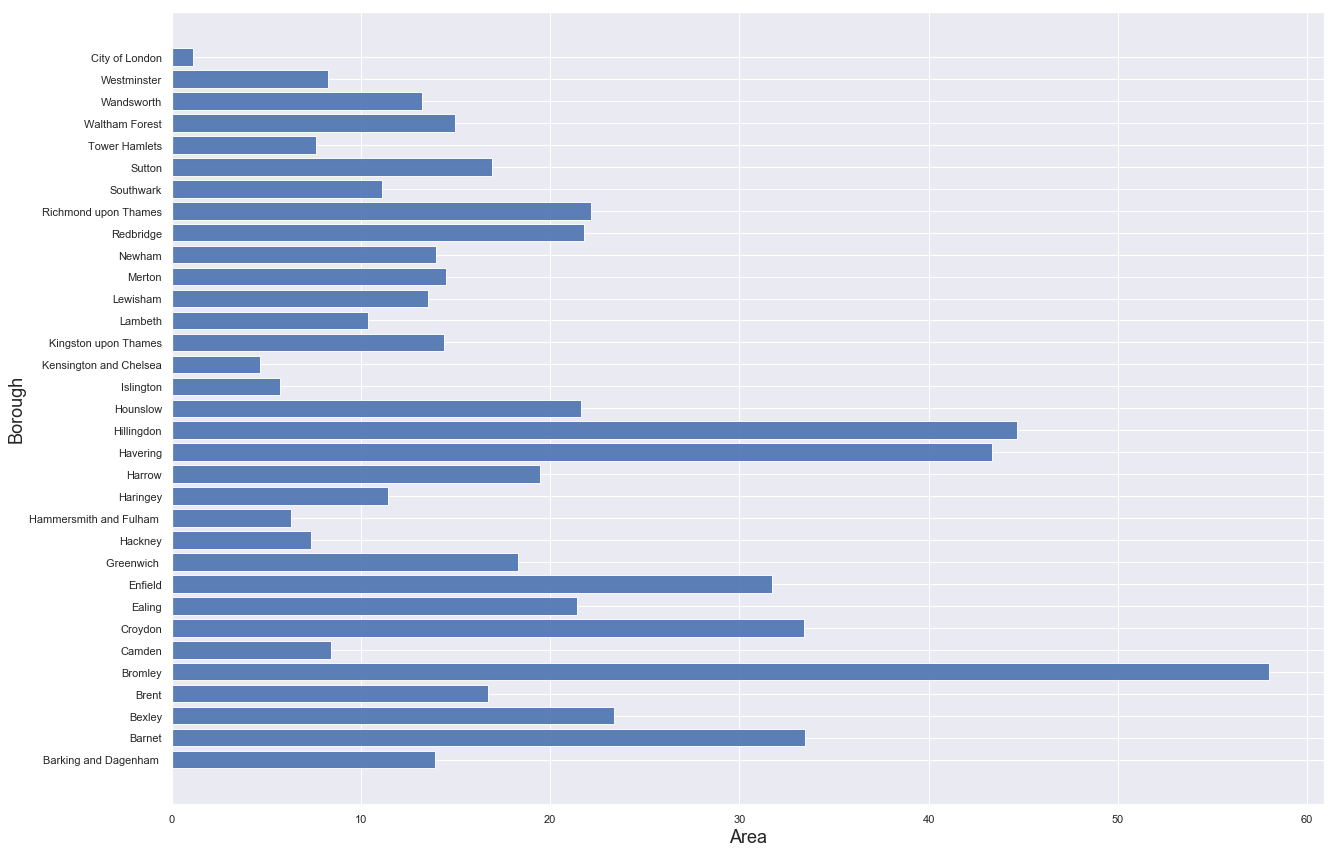

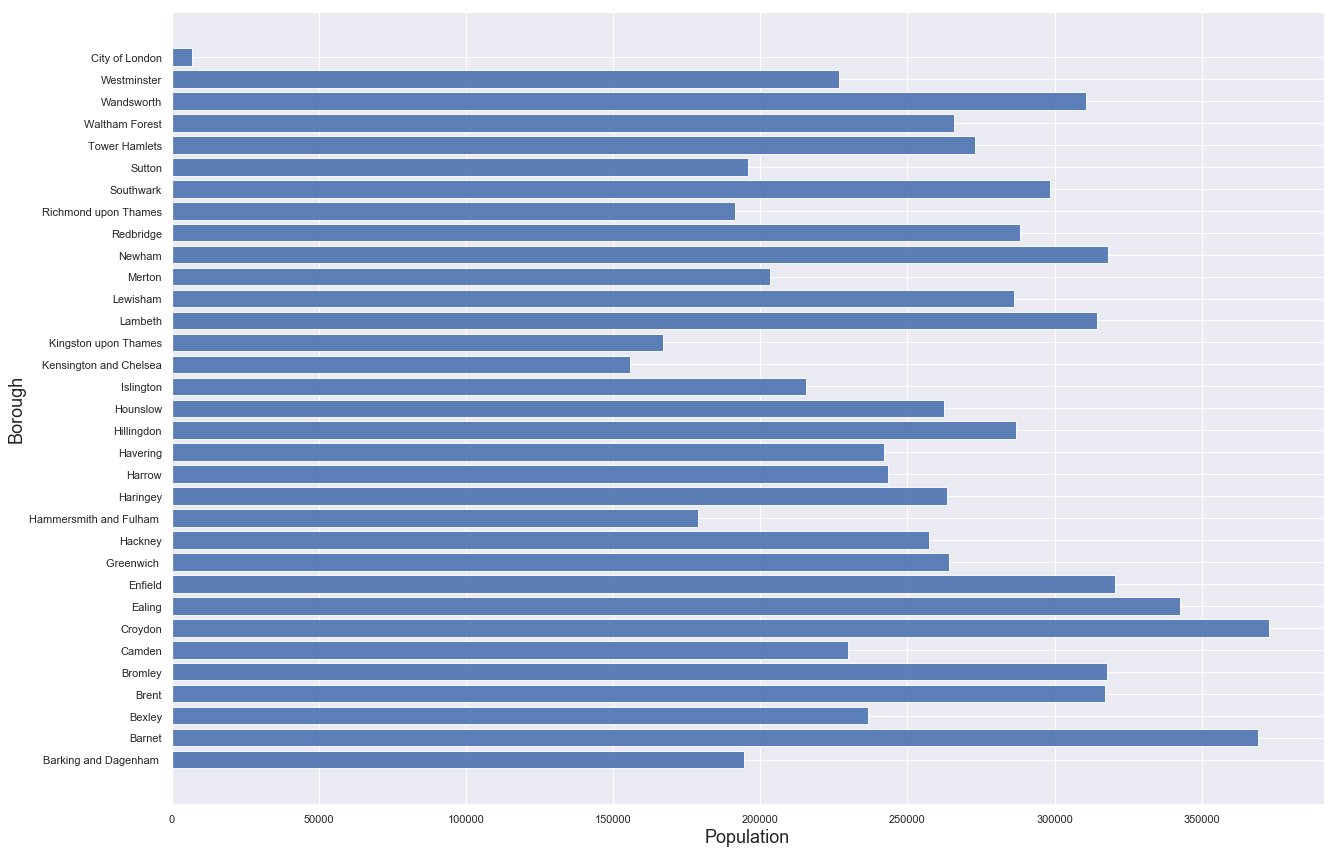

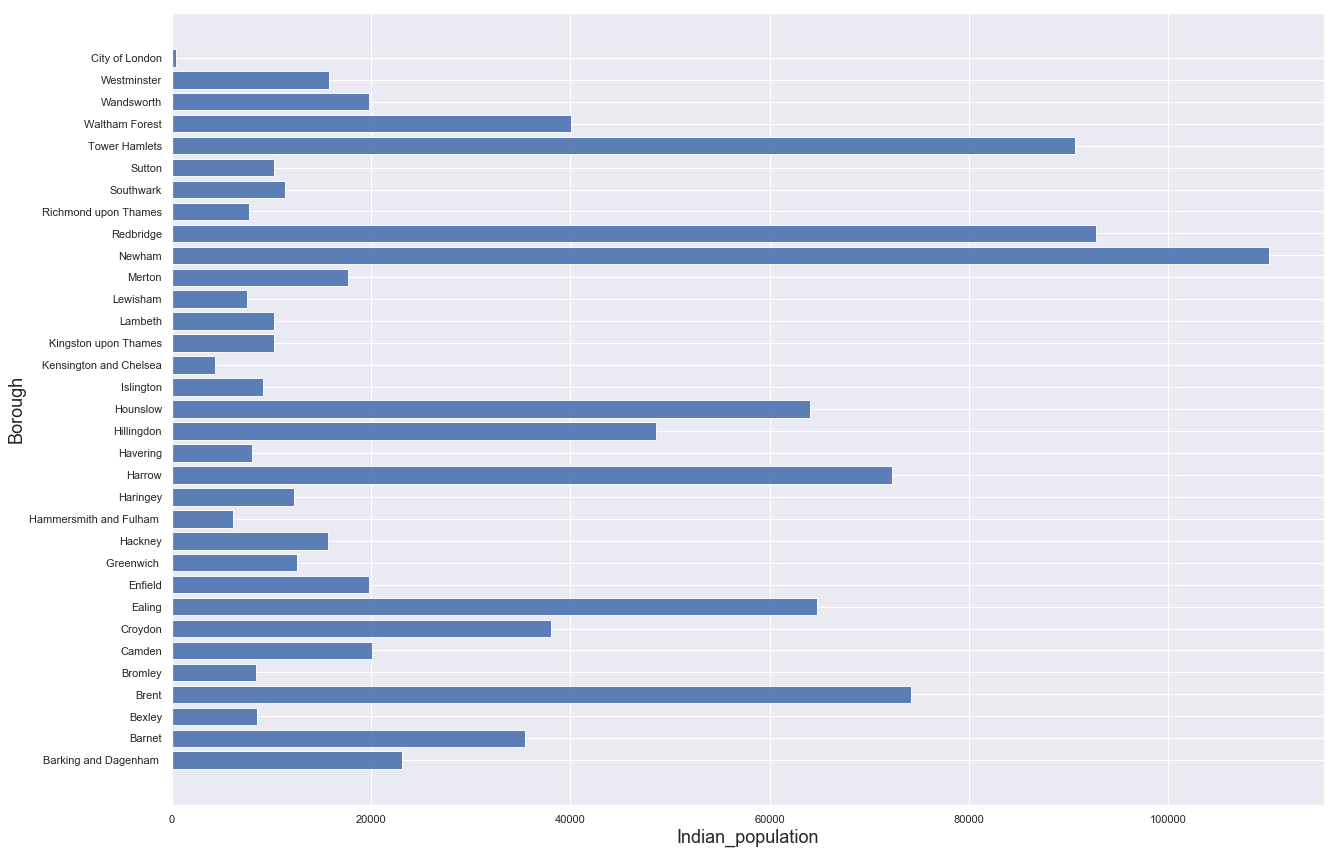

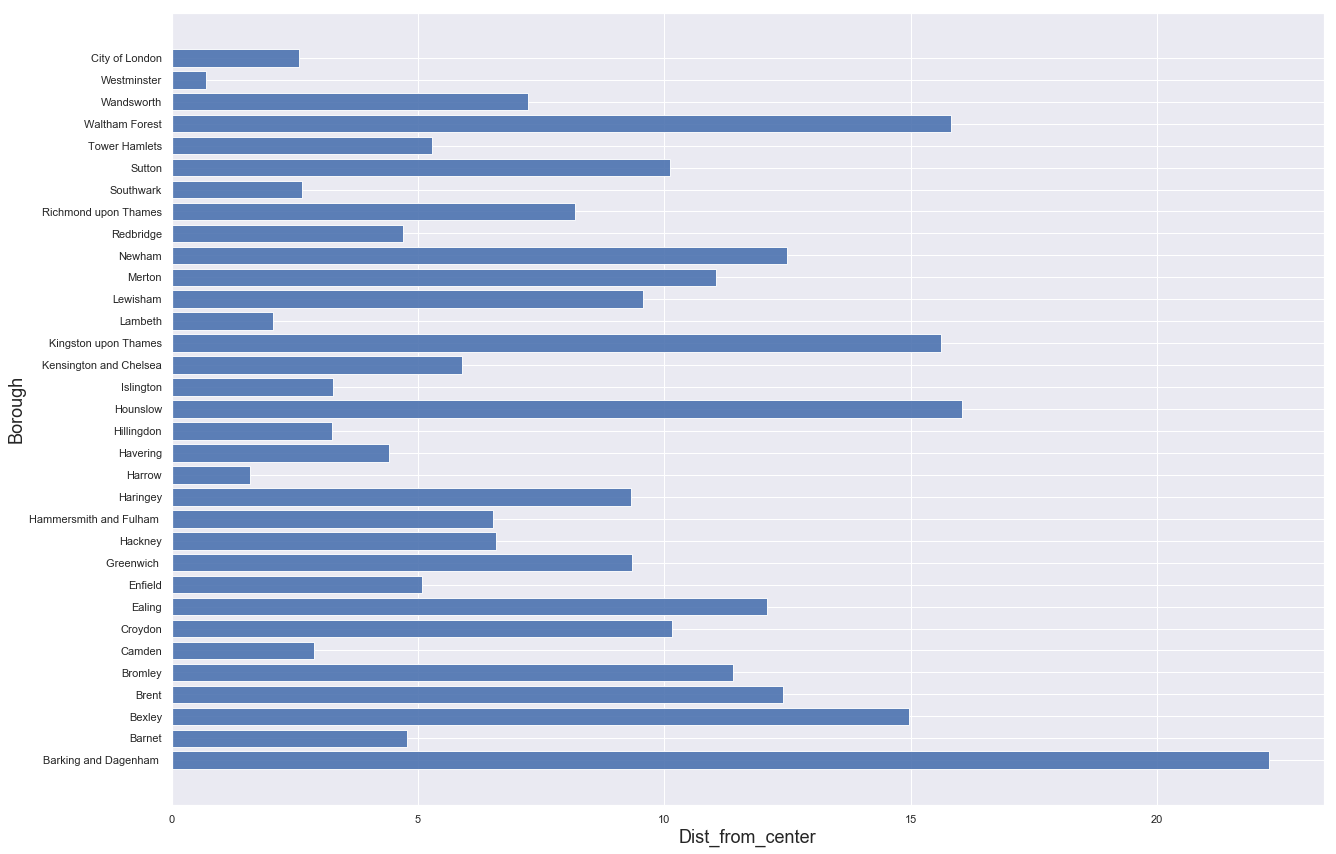

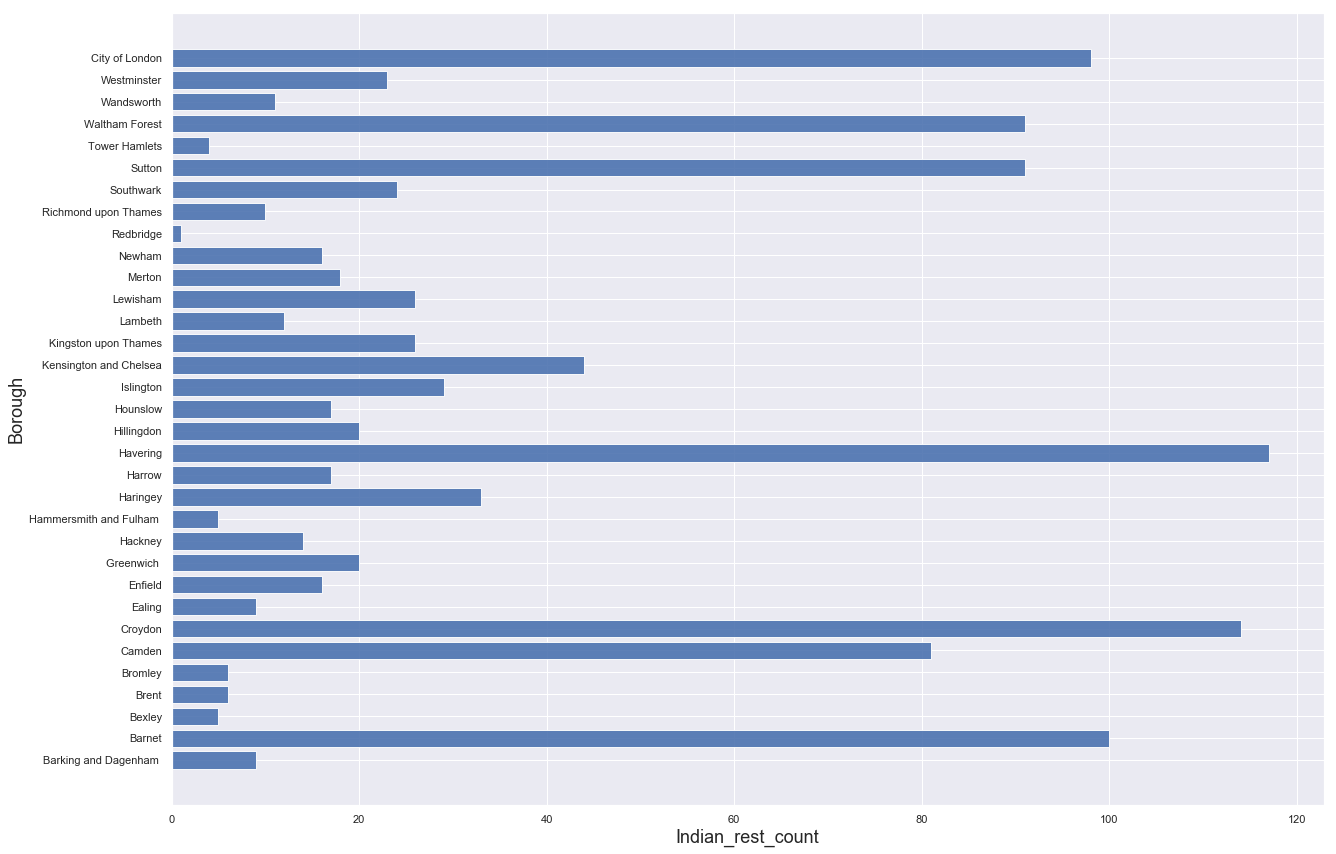

In [32]:
for i in ['Area','Population','Indian_population','Dist_from_center','Indian_rest_count']:
    fig = plt.figure(figsize=(16,11))
    ax = fig.add_axes([0,0,1,1])
    ax.barh(London_df['Borough'],London_df[i], alpha= 0.9)
    ax.set_ylabel('Borough',fontsize=18)
    ax.set_xlabel(i,fontsize=18)

    #for tick in ax.get_xticklabels():
        #tick.set_rotation(90)
        


In [33]:
London_df[["Indian_population","Indian_rest_count"]].corr()

,Indian_population,Indian_rest_count
Indian_population,1.000000,-0.231645
Indian_rest_count,-0.231645,1.000000


Now get the top 100 venues from neighborhood


In [34]:
top_100 = False
try:
    top_100_df = pd.read_csv("top_100.csv")
    top_100 = True
except:
    pass
    

In [35]:
if not top_100:
    top_100 = []
    for borough,lat, lng in zip(London_df['Borough'],London_df['Lat'], London_df['Lng']):

        # create the API request URL
        url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
            client_id,
            client_secret,
            version,
            lat,
            lng,
            2000, 
            100)
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']

        # return only relevant information for each nearby venue
        for top in results:
            top_100.append((
                borough,
                lat, 
                lng, 
                top['venue']['name'], 
                top['venue']['location']['lat'], 
                top['venue']['location']['lng'],  
                top['venue']['categories'][0]['name']))
    top_100_df = pd.DataFrame(data = top_100, columns=['Borough','Lat','Lng','name','lat','lng','category'])
    top_100_df.to_csv(r'C:\Users\Shrirang\Desktop\Python Practice\Online Courses\IMB Data Science Cousre\Capstone_Project\Coursera_Capstone\Capstone_project\top_100.csv', index=False)

In [36]:
top_100_df.head(5)

,Borough,Lat,Lng,name,lat,lng,category
0,Barking and Dagenham,51.57478,0.17441,Costa Coffee,51.576890,0.179497,Coffee Shop
1,Barking and Dagenham,51.57478,0.17441,The Range,51.575550,0.180254,Furniture / Home Store
2,Barking and Dagenham,51.57478,0.17441,Debenhams,51.579097,0.182720,Department Store
3,Barking and Dagenham,51.57478,0.17441,Ciao Bella,51.576103,0.182819,Italian Restaurant
4,Barking and Dagenham,51.57478,0.17441,Costa Coffee,51.576481,0.182448,Coffee Shop


## 3. Methodology

We will use area population and venues to divide the Boroughs. We will make clusters of boroughs which has same qualities. For that we will use unsupervised machine learning algorithm K-mean clustering. Also, we will use Elbow method and Sillihoette score to get K values. After getting we will narrow down our analysis to select the Borough which has high Indian origin population, low number of Indian restaurants and it should be as possible as close to city centre. With these criteria we will find the location. 

In [37]:
top_100_df[['Borough','category']].groupby('Borough').count()

,category
Borough,
Barking and Dagenham,84
Barnet,100
Bexley,35
Brent,93
Bromley,100
Camden,100
City of London,100
Croydon,100
Ealing,100


There are 282 unique categories present

In [38]:
print('There are {} unique categories present in Borough'.format(len(top_100_df['category'].unique())))

There are 286 unique categories present in Borough


In [39]:
top_100_dummy = pd.get_dummies(top_100_df[['category']],prefix="", prefix_sep="")

In [40]:
top_100_dummy.head(15)

,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Field,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Canal,Canal Lock,Candy Store,Caribbean Restaurant,Castle,Caucasian Restaurant,Chaat Place,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Cigkofte Place,Circus School,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Football Field,Comedy Club,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cricket Ground,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Doner Restaurant,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Escape Room,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Forest,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,Gelato Shop,General Entertainment,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hardware Store,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Hockey Field,Hookah Bar,Hostel,Hotel,Hotel Bar,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Light Rail Station,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nature Preserve,Nightclub,Noodle House,North Indian Restaurant,Observatory,Opera House,Organic Grocery,Outdoor Sculpture,Pakistani Restaurant,Palace,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pilates Studio,Pizza Place,Planetarium,Playground,Plaza,Polish Restaurant,Pool,Pool Hall,Portuguese Restaurant,Print Shop,Pub,Public Art,Racetrack,Rafting,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Restaurant,River,Rock Club,Roof Deck,Rugby Pitch,Rugby Stadium,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Snack Place,Soccer Field,Soccer Stadium,Social Club,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Trail,Train Station,Tram Station,Tunnel,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wareh

In [41]:
top_100_dummy.shape


(3133, 286)

In [42]:
# add borough column to top_100_dummy
top_100_dummy['Borough'] = top_100_df['Borough']

#rearrange the column
column = top_100_dummy.columns.tolist()

#rearrange the column
column = top_100_dummy.columns.tolist()

top_100_dummy = top_100_dummy[column[-1:] + column[:-1]]

In [43]:
top_100_dummy.shape

(3133, 287)

In [86]:
top_100_dummy.head(5)

,Borough,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Field,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Canal,Canal Lock,Candy Store,Caribbean Restaurant,Castle,Caucasian Restaurant,Chaat Place,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Cigkofte Place,Circus School,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Football Field,Comedy Club,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cricket Ground,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Doner Restaurant,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Escape Room,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Forest,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,Gelato Shop,General Entertainment,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hardware Store,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Hockey Field,Hookah Bar,Hostel,Hotel,Hotel Bar,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Light Rail Station,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nature Preserve,Nightclub,Noodle House,North Indian Restaurant,Observatory,Opera House,Organic Grocery,Outdoor Sculpture,Pakistani Restaurant,Palace,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pilates Studio,Pizza Place,Planetarium,Playground,Plaza,Polish Restaurant,Pool,Pool Hall,Portuguese Restaurant,Print Shop,Pub,Public Art,Racetrack,Rafting,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Restaurant,River,Rock Club,Roof Deck,Rugby Pitch,Rugby Stadium,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Snack Place,Soccer Field,Soccer Stadium,Social Club,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Trail,Train Station,Tram Station,Tunnel,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaura

In [45]:
top_100_dummy_grouped = top_100_dummy.groupby('Borough').mean().reset_index()

In [46]:
top_100_dummy_grouped

,Borough,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Field,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Canal,Canal Lock,Candy Store,Caribbean Restaurant,Castle,Caucasian Restaurant,Chaat Place,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Cigkofte Place,Circus School,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Football Field,Comedy Club,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cricket Ground,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Doner Restaurant,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Escape Room,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Forest,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,Gelato Shop,General Entertainment,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hardware Store,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Hockey Field,Hookah Bar,Hostel,Hotel,Hotel Bar,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Light Rail Station,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nature Preserve,Nightclub,Noodle House,North Indian Restaurant,Observatory,Opera House,Organic Grocery,Outdoor Sculpture,Pakistani Restaurant,Palace,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pilates Studio,Pizza Place,Planetarium,Playground,Plaza,Polish Restaurant,Pool,Pool Hall,Portuguese Restaurant,Print Shop,Pub,Public Art,Racetrack,Rafting,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Restaurant,River,Rock Club,Roof Deck,Rugby Pitch,Rugby Stadium,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Snack Place,Soccer Field,Soccer Stadium,Social Club,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Trail,Train Station,Tram Station,Tunnel,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaura

In [47]:
top_100_dummy_grouped.shape

(33, 287)

Get the top 10 commom place from each of the borough 

In [48]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
areaColumns = ['Borough']
freqColumns = []
for ind in np.arange(num_top_venues):
    try:
        freqColumns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        freqColumns.append('{}th Most Common Venue'.format(ind+1))
columns = areaColumns+freqColumns

# create a new dataframe
borough_venues_sorted = pd.DataFrame(columns=columns)
borough_venues_sorted['Borough'] = top_100_dummy_grouped ['Borough']


for ind in np.arange(top_100_dummy_grouped.shape[0]):
    row_categories = top_100_dummy_grouped.iloc[ind, :].iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    borough_venues_sorted.iloc[ind, 1:] = row_categories_sorted.index.values[0:num_top_venues]





In [79]:
borough_venues_sorted

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,Coffee Shop,Clothing Store,Fast Food Restaurant,Grocery Store,Shopping Mall,Park,Supermarket,Furniture / Home Store,Café,Pub
1,Barnet,Coffee Shop,Pub,Café,Italian Restaurant,Restaurant,Pizza Place,Bookstore,Wine Bar,Beer Bar,Market
2,Bexley,Grocery Store,Park,Pub,Mediterranean Restaurant,Castle,Garden,Supermarket,Forest,Department Store,Café
3,Brent,Coffee Shop,Supermarket,Turkish Restaurant,Café,Gym / Fitness Center,Park,Grocery Store,Japanese Restaurant,Italian Restaurant,Bakery
4,Bromley,Pub,Coffee Shop,Supermarket,Bar,Grocery Store,Brewery,Park,Café,Fast Food Restaurant,Furniture / Home Store
5,Camden,Coffee Shop,Grocery Store,Breakfast Spot,Market,Pizza Place,Bookstore,Plaza,Beer Bar,Bakery,Modern European Restaurant
6,City of London,Coffee Shop,Gym / Fitness Center,Hotel,Cocktail Bar,Pub,Pizza Place,History Museum,Steakhouse,Falafel Restaurant,Breakfast Spot
7,Croydon,Turkish Restaurant,Pub,Café,Mediterranean Restaurant,Park,Supermarket,Hookah Bar,Grocery Store,Coffee Shop,Lounge
8,Ealing,Coffee Shop,Pub,Park,Italian Restaurant,Pizza Place,Gym / Fitness Center,Grocery Store,Burger Joint,Hotel,Café
9,Enfield,Pub,Bakery,Coffee Shop,Café,Pizza Place,Restaurant,Bookstore,Modern European Restaurant,Park,Deli / Bodega


In [50]:
London_df.head()

,Borough,Lat,Lng,Area,Population,Indian_population,Dist_from_center,Indian_rest_count
0,Barking and Dagenham,51.574780,0.174410,13.93,194352.0,23144,22.265301,9
1,Barnet,51.527095,-0.066826,33.49,369088.0,35479,4.781269,100
2,Bexley,51.452078,0.069931,23.38,236687.0,8554,14.970919,5
3,Brent,51.609783,-0.194672,16.70,317264.0,74147,12.415363,6
4,Bromley,51.601511,-0.066365,57.97,317899.0,8494,11.390290,6


Lets add the popuation, area, and distance from center to make a clusters 

In [51]:
top_100_dummy_grouped['Area'] = London_df['Area']
top_100_dummy_grouped['Population'] = London_df['Population']
top_100_dummy_grouped['Dist_from_center'] = London_df['Dist_from_center']
top_100_dummy_grouped['Indian_population'] = London_df['Indian_population']
top_100_dummy_grouped['Indian_rest_count'] = London_df['Indian_rest_count']

In [52]:
top_100_dummy_grouped.head()

,Borough,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Field,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Canal,Canal Lock,Candy Store,Caribbean Restaurant,Castle,Caucasian Restaurant,Chaat Place,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Cigkofte Place,Circus School,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Football Field,Comedy Club,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cricket Ground,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Doner Restaurant,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Escape Room,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Forest,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,Gelato Shop,General Entertainment,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hardware Store,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Hockey Field,Hookah Bar,Hostel,Hotel,Hotel Bar,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Light Rail Station,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nature Preserve,Nightclub,Noodle House,North Indian Restaurant,Observatory,Opera House,Organic Grocery,Outdoor Sculpture,Pakistani Restaurant,Palace,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pilates Studio,Pizza Place,Planetarium,Playground,Plaza,Polish Restaurant,Pool,Pool Hall,Portuguese Restaurant,Print Shop,Pub,Public Art,Racetrack,Rafting,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Restaurant,River,Rock Club,Roof Deck,Rugby Pitch,Rugby Stadium,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Snack Place,Soccer Field,Soccer Stadium,Social Club,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Trail,Train Station,Tram Station,Tunnel,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaura

In [53]:
# Lets re arrange the columns of data set

column = top_100_dummy_grouped.columns.tolist()
columns_new = column[:1] + column[-5:] + column[1:-5]
top_100_dummy_grouped = top_100_dummy_grouped[columns_new]

In [82]:
top_100_dummy_grouped.head()

,Borough,Area,Population,Dist_from_center,Indian_population,Indian_rest_count,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Field,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Canal,Canal Lock,Candy Store,Caribbean Restaurant,Castle,Caucasian Restaurant,Chaat Place,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Cigkofte Place,Circus School,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Football Field,Comedy Club,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cricket Ground,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Doner Restaurant,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Escape Room,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Forest,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,Gelato Shop,General Entertainment,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hardware Store,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Hockey Field,Hookah Bar,Hostel,Hotel,Hotel Bar,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Light Rail Station,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nature Preserve,Nightclub,Noodle House,North Indian Restaurant,Observatory,Opera House,Organic Grocery,Outdoor Sculpture,Pakistani Restaurant,Palace,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pilates Studio,Pizza Place,Planetarium,Playground,Plaza,Polish Restaurant,Pool,Pool Hall,Portuguese Restaurant,Print Shop,Pub,Public Art,Racetrack,Rafting,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Restaurant,River,Rock Club,Roof Deck,Rugby Pitch,Rugby Stadium,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Snack Place,Soccer Field,Soccer Stadium,Social Club,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Trail,Train Station,Tram Station,Tunnel,Turkish Restaurant,Udon Restaura

In [55]:
from sklearn.preprocessing import RobustScaler

In [56]:
top_100_dummy_grouped_scaled = RobustScaler().fit_transform(top_100_dummy_grouped.iloc[:,1:])

In [57]:
top_100_dummy_grouped_scaled = pd.DataFrame(data = top_100_dummy_grouped_scaled, 
                                            columns=top_100_dummy_grouped.columns.tolist()[1:])

In [58]:
top_100_dummy_grouped_scaled

,Area,Population,Dist_from_center,Indian_population,Indian_rest_count,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Field,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Canal,Canal Lock,Candy Store,Caribbean Restaurant,Castle,Caucasian Restaurant,Chaat Place,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Cigkofte Place,Circus School,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Football Field,Comedy Club,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cricket Ground,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Doner Restaurant,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Escape Room,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Forest,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,Gelato Shop,General Entertainment,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hardware Store,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Hockey Field,Hookah Bar,Hostel,Hotel,Hotel Bar,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Light Rail Station,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nature Preserve,Nightclub,Noodle House,North Indian Restaurant,Observatory,Opera House,Organic Grocery,Outdoor Sculpture,Pakistani Restaurant,Palace,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pilates Studio,Pizza Place,Planetarium,Playground,Plaza,Polish Restaurant,Pool,Pool Hall,Portuguese Restaurant,Print Shop,Pub,Public Art,Racetrack,Rafting,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Restaurant,River,Rock Club,Roof Deck,Rugby Pitch,Rugby Stadium,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Snack Place,Soccer Field,Soccer Stadium,Social Club,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Trail,Train Station,Tram Station,Tunnel,Turkish Restaurant,Udon Restaurant,Veget

In [59]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score

In [60]:
intertias = {}
silhouette_scores= {}
klist = range(2,15)
for k in klist:
    kmeans = KMeans(n_clusters= k ,init='k-means++' , n_init=10).fit(top_100_dummy_grouped_scaled.iloc[:,:5])
    label = kmeans.predict(top_100_dummy_grouped_scaled.iloc[:,:5])
    intertias[k] = kmeans.inertia_
    silhouette_scores[k] = silhouette_score(X = top_100_dummy_grouped_scaled.iloc[:,:5],labels=label)

In [61]:
silhouette_scores 

{2: 0.4391083864703715,
 3: 0.3427266766005507,
 4: 0.38967128027958875,
 5: 0.38366820715318434,
 6: 0.3323420059003191,
 7: 0.31926306658747095,
 8: 0.2999304152190526,
 9: 0.2605328707302301,
 10: 0.27296342777198684,
 11: 0.1944156752745265,
 12: 0.22303480463436295,
 13: 0.22733201485230436,
 14: 0.19282372305733836}

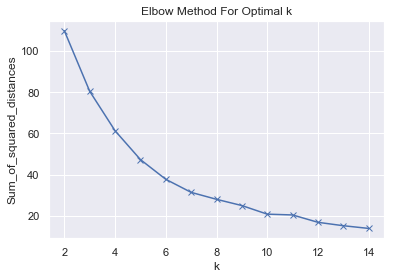

In [62]:
plt.plot(klist, intertias.values(), 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

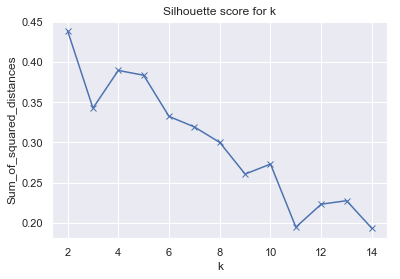

In [63]:
plt.plot(klist, silhouette_scores.values(), 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Silhouette score for k')
plt.show()

In [64]:
# As we can see k=4 gives good silhouette score , we will use this for our score

In [65]:
kmeans = KMeans(n_clusters= 4 ,init='k-means++' , n_init=10).fit(top_100_dummy_grouped_scaled.iloc[:,:5])
label = kmeans.predict(top_100_dummy_grouped_scaled.iloc[:,:5])

In [66]:
London_df['cluster_labels'] = label

In [68]:
# map of boroughes with clusters_labes  
map_clusters = folium.Map(location= coordinated_centerlondon, zoom_start=11)

# set color scheme for the clusters
x = np.arange(4)
ys = [i+x+(i*x)**2 for i in range(4)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lng, borough, cluster in zip(London_df['Lat'], London_df['Lng'], London_df['Borough'], London_df['cluster_labels']):
    label = folium.Popup(str(borough) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2.5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [69]:
London_df[London_df['cluster_labels'] == 0]

,Borough,Lat,Lng,Area,Population,Indian_population,Dist_from_center,Indian_rest_count,cluster_labels
4,Bromley,51.601511,-0.066365,57.97,317899.0,8494,11.390290,6,0
8,Enfield,51.540024,-0.077502,31.74,320524.0,19841,5.087251,16,0
15,Hillingdon,51.484230,-0.096477,44.67,286806.0,48634,3.263482,20,0


In [70]:
London_df[London_df['cluster_labels'] == 1]

,Borough,Lat,Lng,Area,Population,Indian_population,Dist_from_center,Indian_rest_count,cluster_labels
0,Barking and Dagenham,51.574780,0.174410,13.93,194352.0,23144,22.265301,9,1
2,Bexley,51.452078,0.069931,23.38,236687.0,8554,14.970919,5,1
9,Greenwich,51.484540,0.002750,18.28,264008.0,12543,9.347909,20,1
10,Hackney,51.545050,-0.055320,7.36,257379.0,15684,6.585195,14,1
11,Hammersmith and Fulham,51.482600,-0.212880,6.33,178685.0,6119,6.513223,5,1
12,Haringey,51.589270,-0.106405,11.42,263386.0,12282,9.330087,33,1
17,Islington,51.532790,-0.106140,5.74,215667.0,9147,3.278186,29,1
18,Kensington and Chelsea,51.522660,-0.207930,4.68,155594.0,4324,5.887560,44,1
19,Kingston upon Thames,51.410881,-0.291933,14.38,166793.0,10226,15.622353,26,1
20,Lambeth,51.490840,-0.111080,10.36,314242.0,10276,2.063809,12,1


In [71]:
London_df[London_df['cluster_labels'] == 2]

,Borough,Lat,Lng,Area,Population,Indian_population,Dist_from_center,Indian_rest_count,cluster_labels
1,Barnet,51.527095,-0.066826,33.49,369088.0,35479,4.781269,100,2
5,Camden,51.532360,-0.127960,8.40,229719.0,20074,2.886507,81,2
6,Croydon,51.593480,-0.083420,33.41,372752.0,38095,10.151281,114,2
14,Havering,51.544610,-0.144260,43.35,242080.0,8046,4.410650,117,2
27,Sutton,51.486004,-0.269183,16.93,195914.0,10232,10.117759,91,2
29,Waltham Forest,51.630613,-0.016275,14.99,265797.0,40113,15.814267,91,2
32,City of London,51.520500,-0.097430,1.12,7000.0,464,2.593803,98,2


In [72]:
London_df[London_df['cluster_labels'] == 3]

,Borough,Lat,Lng,Area,Population,Indian_population,Dist_from_center,Indian_rest_count,cluster_labels
3,Brent,51.609783,-0.194672,16.70,317264.0,74147,12.415363,6,3
7,Ealing,51.514060,-0.300730,21.44,342494.0,64737,12.076566,9,3
13,Harrow,51.513180,-0.106980,19.49,243372.0,72226,1.593181,17,3
16,Hounslow,51.471393,-0.351374,21.61,262407.0,64026,16.050092,17,3
23,Newham,51.519716,0.051479,13.98,318227.0,110053,12.492628,16,3
24,Redbridge,51.475773,-0.080698,21.78,288272.0,92722,4.696983,1,3
28,Tower Hamlets,51.520220,-0.054310,7.63,272890.0,90606,5.288516,4,3


In [84]:
London_df[London_df['Borough'] == 'Redbridge']

,Borough,Lat,Lng,Area,Population,Indian_population,Dist_from_center,Indian_rest_count,cluster_labels
24,Redbridge,51.475773,-0.080698,21.78,288272.0,92722,4.696983,1,3


Cluster 3 has more number of the Indian population , compaired with other clusters, but has low number of the Indian restaurants unlike cluster 1,
Redbridge is looking very good for opening new retaurants because , it has very high numbers of Indian population(3 times than average), also it's with in 5 km from city center , More importantly it has only one Indian restaurant.
Lets explore more the Redbridge

In [73]:
redbridge = top_100_df[top_100_df['Borough'] == 'Redbridge']

In [74]:
redbridge.shape

(100, 7)

In [75]:
redbridge_rest = redbridge[redbridge['category'].str.lower().str.contains('restaurant')].reset_index()

In [85]:
redbridge_rest

,index,Borough,Lat,Lng,name,lat,lng,category
0,2298,Redbridge,51.475773,-0.080698,Silk Road,51.473820,-0.089284,Xinjiang Restaurant
1,2300,Redbridge,51.475773,-0.080698,Ganapati,51.469634,-0.072924,Indian Restaurant
2,2302,Redbridge,51.475773,-0.080698,Zeret Kitchen,51.478626,-0.094378,Ethiopian Restaurant
3,2303,Redbridge,51.475773,-0.080698,Coal Rooms,51.470078,-0.069296,Restaurant
4,2308,Redbridge,51.475773,-0.080698,Yadas,51.470575,-0.068536,Middle Eastern Restaurant
5,2310,Redbridge,51.475773,-0.080698,Artusi,51.466730,-0.072847,Italian Restaurant
6,2312,Redbridge,51.475773,-0.080698,FM Mangal,51.473820,-0.089404,Turkish Restaurant
7,2316,Redbridge,51.475773,-0.080698,Nandine,51.473923,-0.089615,Middle Eastern Restaurant
8,2326,Redbridge,51.475773,-0.080698,Miss Tapas,51.467963,-0.069083,Tapas Restaurant
9,2327,Redbridge,51.475773,-0.080698,Falafel And Shawarma,51.474045,-0.090308,Middle Eastern Restaurant


## 4. Result
Cluster number 3 seems to be more interesting. It has more Indian population and has low number of Indian restaurants Unlike the other cluster, if we narrow down our analysis, we can see that Redbridge has Indian population around 32% of the total population. Redbridge has 27 restaurants in that only one is Indian. Additional to that it is very close to city centre around 4.6 Km. That is why Redbridge is very promising area to open the new Indian restaurant.

In [76]:
map_la = folium.Map(location = (51.475773,-0.080698), zoom_start = 13)
folium.Marker((51.475773,-0.080698), popup='Redbridge').add_to(map_la)
for lat, lng in zip(redbridge_rest['lat'], redbridge_rest['lng']):
    #folium.CircleMarker([lat, lng], radius=2, color='blue', fill=True, fill_color='blue', fill_opacity=1).add_to(map_la)
    folium.Circle([lat,lng], radius=3,color ="blue").add_to(map_la)
map_la

## 5 Conclusion <a name="conclusion"></a>

London has good number Indian, Pakistani and Bangladeshi people. It is good to open an Indian restaurant in anywhere in London however, the location of the restaurant is key point in business. So, we consider some criteria to open the Indian restaurant.
And according to our analysis, Redbridge borough is very good place to open the new Indian restaurant
